In [1]:
import numpy as np
import os,random,shutil
np.random.seed(7)

In [2]:
# 为Keras模型准备数据集
#1，指定一些超参数：
FOLDER='E:\PyProjects\DataSet\Small_set_5_Class'
train_data_dir=os.path.join(FOLDER,'train')
val_data_dir=os.path.join(FOLDER,'test')
train_samples_num=400 # train set中全部照片数
val_samples_num=100
IMG_W,IMG_H,IMG_CH=150,150,3 # 单张图片的大小
batch_size=32
epochs=50  # 用比较少的epochs数目做演示，节约训练时间
class_num=5 # 此处有5个类别

In [3]:
# 2，准备训练集，keras有很多Generator可以直接处理图片的加载，增强等操作，封装的非常好
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( # 单张图片的处理方式，train时一般都会进行图片增强
        rescale=1. / 255, # 图片像素值为0-255，此处都乘以1/255，调整到0-1之间
        shear_range=0.2, # 斜切
        zoom_range=0.2, # 放大缩小范围
        horizontal_flip=True) # 水平翻转

train_generator = train_datagen.flow_from_directory(# 从文件夹中产生数据流
    train_data_dir, # 训练集图片的文件夹
    target_size=(IMG_W, IMG_H), # 调整后每张图片的大小
    batch_size=batch_size,
    class_mode='categorical') # 此处是多分类问题，故而mode是categorical

Using TensorFlow backend.


Found 400 images belonging to 5 classes.


In [4]:
# 3，同样的方式准备测试集
val_datagen = ImageDataGenerator(rescale=1. / 255) # 只需要和trainset同样的scale即可，不需增强
val_generator = val_datagen.flow_from_directory(
        val_data_dir,
        target_size=(IMG_W, IMG_H),
        batch_size=batch_size,
        class_mode='categorical')

Found 100 images belonging to 5 classes.


In [5]:
# 4，建立Keras模型：模型的建立主要包括模型的搭建，模型的配置
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers
def build_model(input_shape):
    # 模型的搭建：此处构建三个CNN层+2个全连接层的结构
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5)) # Dropout防止过拟合
    model.add(Dense(class_num)) # 此处多分类问题，用Dense(class_num)
    model.add(Activation('softmax')) #多分类问题用softmax作为activation function
    
    # 模型的配置
    model.compile(loss='categorical_crossentropy', # 定义模型的loss func，optimizer，
                  optimizer=optimizers.RMSprop(), # 使用默认的lr=0.001
                  metrics=['accuracy'])# 主要优化accuracy

    return model # 返回构建好的模型

In [6]:
model=build_model(input_shape=(IMG_W,IMG_H,IMG_CH)) # 输入的图片维度
# 模型的训练
history_ft = model.fit_generator(train_generator, # 数据流
                        steps_per_epoch=train_samples_num // batch_size, 
                        epochs=epochs,
                        validation_data=val_generator,
                        validation_steps=val_samples_num // batch_size)

Epoch 1/50
12/12 [==============================] - 24s 2s/step - loss: 2.6734 - acc: 0.2376 - val_loss: 1.4268 - val_acc: 0.4583
Epoch 2/50
12/12 [==============================] - 24s 2s/step - loss: 1.4014 - acc: 0.4170 - val_loss: 0.9835 - val_acc: 0.8229
Epoch 3/50
12/12 [==============================] - 24s 2s/step - loss: 1.2627 - acc: 0.4865 - val_loss: 1.3209 - val_acc: 0.3958
Epoch 4/50
12/12 [==============================] - 24s 2s/step - loss: 1.1877 - acc: 0.5496 - val_loss: 0.6752 - val_acc: 0.7708
Epoch 5/50
12/12 [==============================] - 23s 2s/step - loss: 0.9243 - acc: 0.6801 - val_loss: 1.0047 - val_acc: 0.5833
Epoch 6/50
12/12 [==============================] - 26s 2s/step - loss: 0.9172 - acc: 0.6693 - val_loss: 0.7542 - val_acc: 0.7500
Epoch 7/50
12/12 [==============================] - 24s 2s/step - loss: 0.5917 - acc: 0.8073 - val_loss: 1.1518 - val_acc: 0.6979
Epoch 8/50
12/12 [==============================] - 25s 2s/step - loss: 0.8342 - acc: 0.71

In [7]:
# 画图，将训练时的acc和loss都绘制到图上
import matplotlib.pyplot as plt
%matplotlib inline
def plot_training(history):
    plt.figure(12)
    
    plt.subplot(121)
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(len(train_acc))
    plt.plot(epochs, train_acc, 'b',label='train_acc')
    plt.plot(epochs, val_acc, 'r',label='test_acc')
    plt.title('Train and Test accuracy')
    plt.legend()
    
    plt.subplot(122)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(train_loss))
    plt.plot(epochs, train_loss, 'b',label='train_loss')
    plt.plot(epochs, val_loss, 'r',label='test_loss')
    plt.title('Train and Test loss')
    plt.legend()
 
    plt.show()

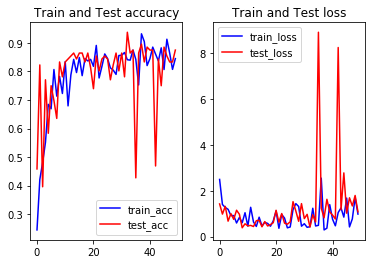

In [8]:
plot_training(history_ft)